In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diwali.csv",encoding="unicode escape")

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df['Age']

0        28
1        35
2        35
3        16
4        28
         ..
11246    19
11247    33
11248    40
11249    37
11250    19
Name: Age, Length: 11251, dtype: int64

In [6]:
# check if there is any missing value in the age column
df['Age'].isna().sum()

0

## Checking the normality

In [8]:
import scipy
from scipy import stats as st

((array([-3.83964684, -3.61610005, -3.49344509, ...,  3.49344509,
          3.61610005,  3.83964684]),
  array([12, 12, 12, ..., 92, 92, 92], dtype=int64)),
 (12.29402833167833, 35.421207003821884, 0.9636586551349984))

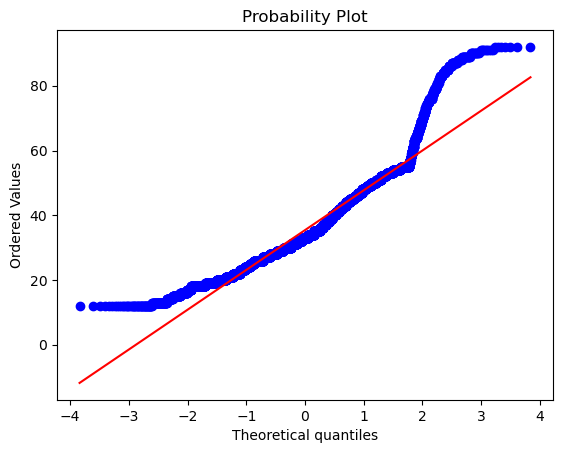

In [9]:
st.probplot(x=df["Age"],plot=plt)

- in the above plot, we can say the age data is not normally distributed
- to solve this issue we can transform the data

In [11]:
np.log(df["Age"])

0        3.332205
1        3.555348
2        3.555348
3        2.772589
4        3.332205
           ...   
11246    2.944439
11247    3.496508
11248    3.688879
11249    3.610918
11250    2.944439
Name: Age, Length: 11251, dtype: float64

((array([-3.83964684, -3.61610005, -3.49344509, ...,  3.49344509,
          3.61610005,  3.83964684]),
  array([2.48490665, 2.48490665, 2.48490665, ..., 4.52178858, 4.52178858,
         4.52178858])),
 (0.34751008106386505, 3.506629174937855, 0.996733796780258))

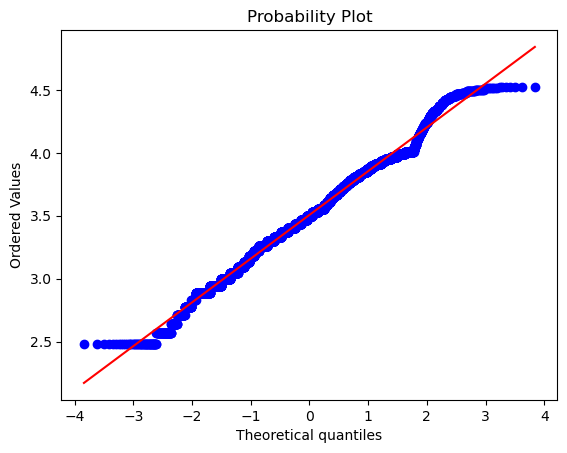

In [10]:
st.probplot(x=np.log(df["Age"]),plot=plt)

In [13]:
# with normaldata
df['Age'].mean(), df['Age'].median(), df['Age'].mode()

(35.421207003821884,
 33.0,
 0    30
 Name: Age, dtype: int64)

In [14]:
# after apply transform feature
np.log(df['Age'].mean()), np.log(df['Age'].median()), np.log(df['Age'].mode())

(3.5673107086747575,
 3.4965075614664802,
 0    3.401197
 Name: Age, dtype: float64)

- according to above statement we can say that age is normaly distributed after transforming the data.


- now we can check/ transform other columns

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [18]:
df['Amount'].isna().sum()

12

In [25]:
#according to above statement there is 12 missing value in amount columns
# we can drop it
df.dropna(subset=['Amount'], inplace=True)

In [26]:
df['Amount'].isna().sum()

0

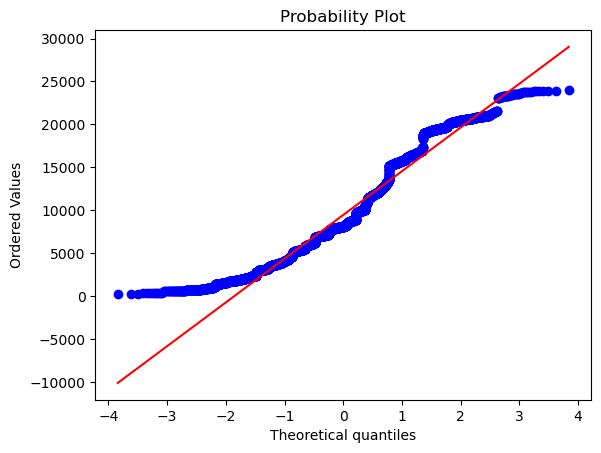

In [27]:
st.probplot(x=df['Amount'],plot=plt)
plt.show()

- there is no normal distribution in that data,
- here we can try to transform the data using exponential method

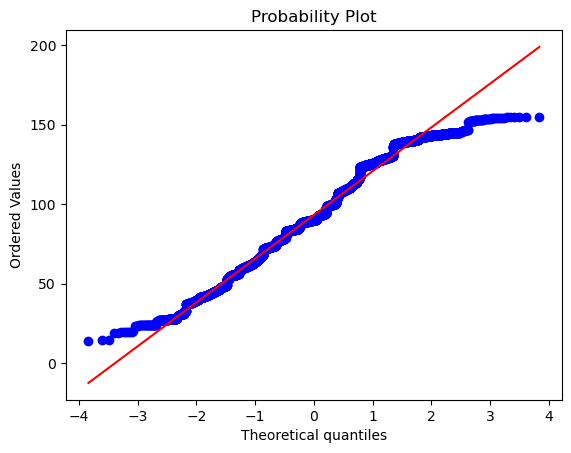

In [29]:
st.probplot(x=np.sqrt(df['Amount']),plot=plt)
plt.show()

In [32]:
ser,box=st.boxcox(df['Amount'])

- here ser, box is used due to there is two arraay in data st.boxcox(df['Amount'])
- to solve this issue we can initiate two variable ser, box variable, ser for column data value & box for another value

((array([-3.83938484, -3.61582366, -3.49316015, ...,  3.49316015,
          3.61582366,  3.83938484]),
  array([ 23.89983928,  25.07246535,  25.5141063 , ..., 267.72901369,
         267.78347779, 267.88148353])),
 (47.236067154667374, 163.06699359364995, 0.9924230516196675))

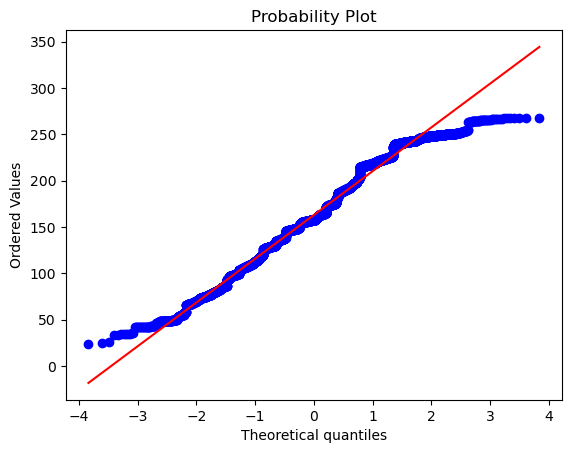

In [33]:
st.probplot(x=ser,plot=plt)

## Feature Scaling
- Feature for transforming data into a common format or scale
- having two type 1) normalization and 2) standarization
- Normalization : -1 to +1, Norm=(data-min)/(max-min), known as min max scaling
- standarization : -3 to +3, std = (data-mean)/std, known as Z score scaling

## Normalization

In [35]:
df['Amount']

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11239, dtype: float64

In [41]:
# create function for normalization
def norms(n):
    x=(n-n.min())/(n.max()-n.min())
    return x

In [42]:
norms(df['Amount'])

0        1.000000
1        0.999243
2        0.998822
3        0.998317
4        0.996844
           ...   
11246    0.007659
11247    0.007532
11248    0.001052
11249    0.000757
11250    0.000000
Name: Amount, Length: 11239, dtype: float64

In [43]:
norms(df['Age'])

0        0.2000
1        0.2875
2        0.2875
3        0.0500
4        0.2000
          ...  
11246    0.0875
11247    0.2625
11248    0.3500
11249    0.3125
11250    0.0875
Name: Age, Length: 11239, dtype: float64

## Standarization

In [46]:
def standr(n):
    x=((n-n.mean())/(n.std()))
    return x

In [47]:
standr(df['Amount'])

0        2.776216
1        2.772770
2        2.770855
3        2.768557
4        2.761855
           ...   
11246   -1.739370
11247   -1.739945
11248   -1.769433
11249   -1.770774
11250   -1.774221
Name: Amount, Length: 11239, dtype: float64